# Import library

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston  # Import dataset
boston_data = load_boston()

/Users/student/PycharmProjects/test/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

# Main codes section

In [53]:
def load_dataframe(dataset):
  df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
  df_boston['MEDV(target)'] = pd.Series(boston_data.target)
  return df_boston

dataset = load_dataframe(boston_data)

In [54]:
def print_summarize_dataset(df):
   print("Dataset dimension:")
   print(df.shape, "\n")
   print("First 10 rows of dataset:")
   print(df.head(10), "\n")
   print("Statistical summary:")
   print(df.describe())

# print_summarize_dataset(dataset)

In [55]:
def clean_dataset(df):
	pass  # Data is clean. Cleaning again is unnecessary

In [56]:
def print_histograms(df):
  df.hist(figsize=(16,10));

# print_histograms(dataset)

In [57]:
def compute_correlations_matrix(df):
  correlations = df.corr()
  print(correlations['MEDV(target)'], "\n")

# compute_correlations_matrix(dataset)

In [58]:
def print_scatter_matrix(df):	#LSTAT, AGE, and CRIME.
	fig, ax = plt.subplots(1, 3, figsize=(20,5))
	fig.suptitle("This is the correlation of MEDV(target) to these columns; LSTAT, AGE, and CRIME")
	sns.scatterplot(ax=ax[0], x=df['LSTAT'], y=df['MEDV(target)'])
	sns.scatterplot(ax=ax[1], x=df['AGE'], y=df['MEDV(target)'])
	sns.scatterplot(ax=ax[2], x=df['CRIM'], y=df['MEDV(target)'])

# print_scatter_matrix(dataset)

In [59]:
def boston_fit_model(boston_dataframe):
  # SELECT two columns from our
  model_dataset = boston_dataframe[["RM",'MEDV(target)']]

  regressor = LinearRegression()

  # Extract column 1
  x = model_dataset.iloc[:, :-1].values

  # Extract column 2
  y = model_dataset.iloc[:, 1].values

  # Train the model
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

  regressor.fit(x_train, y_train)

  return regressor, x_test, y_test

wer = boston_fit_model(dataset)

estimator= wer[0]
x_test = wer[1]
y_test = wer[2]

In [60]:
def boston_predict(estimator, array_to_predict):
  prediced_labels = estimator.predict(array_to_predict)
  return prediced_labels

In [61]:
def print_model_prediction_evaluator(base_test, prediction):
  print('Mean Absolute Error:', mean_absolute_error(base_test, prediction))
  print('Mean Squared Error:', mean_squared_error(base_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(base_test, prediction)))

# Main running section

### Learning dataset

In [62]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV(target)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [63]:
print_summarize_dataset(dataset)

Dataset dimension:
(506, 14) 

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MEDV(target)  
0     15.3  396.90   4.98          24.0  
1     17.8  396.90   9.14          21.6  
2 

In [64]:
dataset.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV(target)    0
dtype: int64

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRIM          506 non-null    float64
 1   ZN            506 non-null    float64
 2   INDUS         506 non-null    float64
 3   CHAS          506 non-null    float64
 4   NOX           506 non-null    float64
 5   RM            506 non-null    float64
 6   AGE           506 non-null    float64
 7   DIS           506 non-null    float64
 8   RAD           506 non-null    float64
 9   TAX           506 non-null    float64
 10  PTRATIO       506 non-null    float64
 11  B             506 non-null    float64
 12  LSTAT         506 non-null    float64
 13  MEDV(target)  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [66]:
dataset.corr()  # This is numerical correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV(target)
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


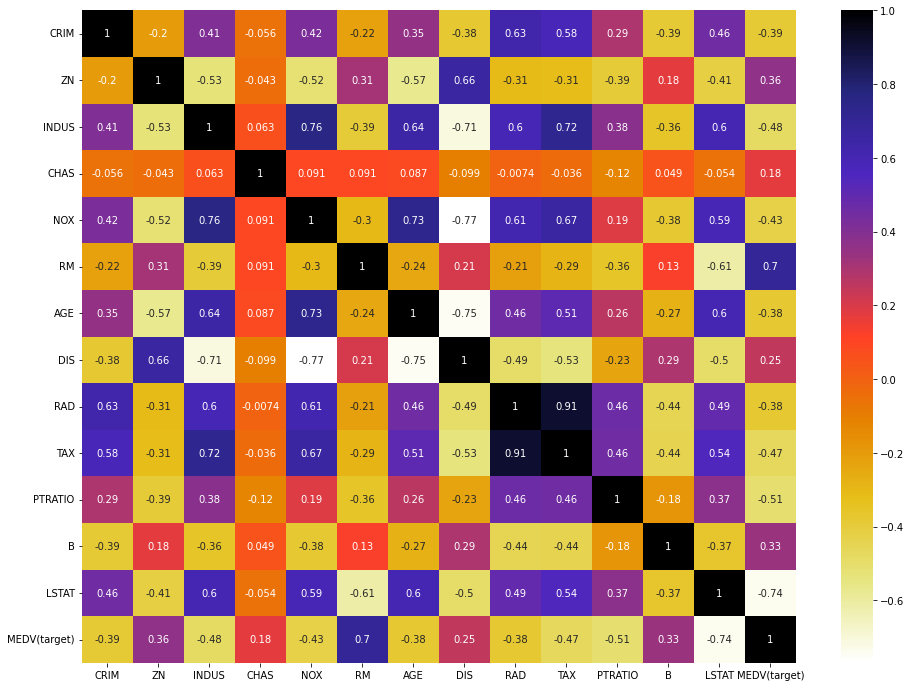

In [67]:
plt.figure(figsize=(16,12))
ax = sns.heatmap(dataset.corr(), annot=True, cmap="CMRmap_r"); # This is graphic correlation

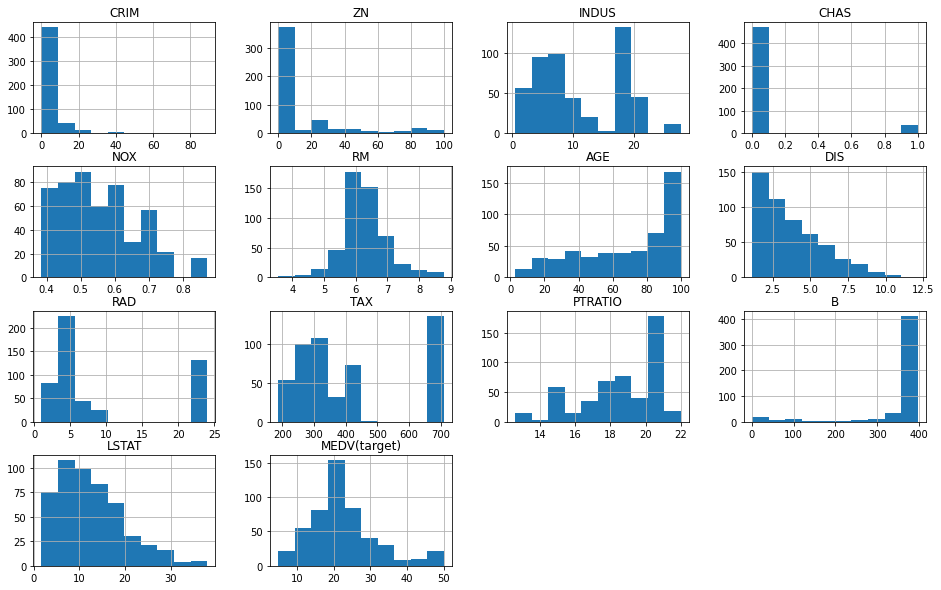

In [68]:
print_histograms(dataset)

In [69]:
compute_correlations_matrix(dataset)

CRIM           -0.388305
ZN              0.360445
INDUS          -0.483725
CHAS            0.175260
NOX            -0.427321
RM              0.695360
AGE            -0.376955
DIS             0.249929
RAD            -0.381626
TAX            -0.468536
PTRATIO        -0.507787
B               0.333461
LSTAT          -0.737663
MEDV(target)    1.000000
Name: MEDV(target), dtype: float64 



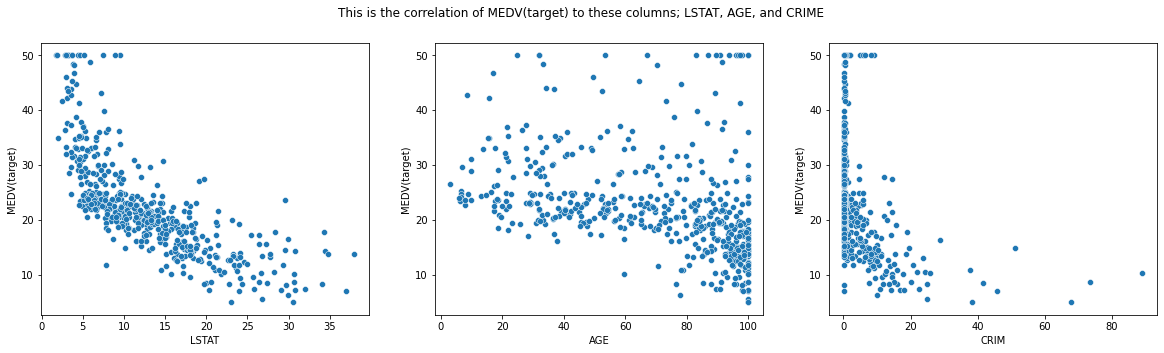

In [70]:
print_scatter_matrix(dataset)

## Prediction section

In [71]:
prediction = boston_predict(estimator, x_test)
print(prediction)

[24.43289531 11.30012946 29.98872897 24.87036253  5.6655517  11.36137487
 27.79264354 28.160116   17.81839099 21.01190167 24.72162367 24.88786122
 18.87706166 10.95890503 25.62280614 23.62795563 21.37937414 16.68097623
 23.74169711 22.14056709 22.65677841 21.14314184 30.49619094 23.23423514
 23.54046219 15.18483834 32.97225538 31.09114635 30.87241274 20.21571134
 16.86471246 20.26820741 26.94395714 22.48179152 14.2486585  16.68972557
 15.88478589 23.40047268 20.11946855 21.16938987 25.10659482 16.1822636
 29.38502421  8.1503655  22.06182299 21.63310512 30.2512093  21.86058807
 27.3114296   7.94038123 27.4689178  28.81631682 15.15859031 28.41384698
 16.51473868 24.27540711 19.02580051 16.17351425 19.27953149 18.25585821
 18.10711935 19.38452363 18.0371246  27.37267501 27.04894927 26.305255
 36.15701672 27.63515534 14.60738162 23.90793465 19.50701445 11.19513733
 20.99440299 17.43341984 25.46531794 26.89146107 18.89456034 19.77824412
 18.08087132 23.34797661 28.90381027 21.94808152 21.77

## Assessment section

In [72]:
print_model_prediction_evaluator(y_test, prediction)

Mean Absolute Error: 4.090064955184419
Mean Squared Error: 30.65759280465092
Root Mean Squared Error: 5.536929907868703
